In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Directory containing CSV files
directory = "CSVfiles/"

dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract stock name from filename
        stock_name = filename.split(".")[0]
        
        # Read CSV file into DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Add new column "stock name"
        df["stock_name"] = stock_name

        dfs.append(df)

In [3]:
merged_df = pd.concat(dfs, ignore_index=True)

# Convert 'data-date' column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

#Make csv file
merged_df.to_csv('merged_df.csv')

merged_df

date      open      high       low     close    volume  \
0     2014-02-21   19.0438   19.1145   18.8421   18.8421  31485147   
1     2014-02-24   18.8931   19.0209   18.7314   18.8335  41861632   
2     2014-02-25   18.8591   18.9187   18.5270   18.5951  45400603   
3     2014-02-26   18.5951   18.7484   18.3482   18.6718  43575225   
4     2014-02-27   18.6292   18.7739   18.6122   18.6633  25804236   
...          ...       ...       ...       ...       ...       ...   
36845 2019-02-13  134.0700  134.9800  133.2100  134.4500   7902181   
36846 2019-02-14  134.3000  134.8200  133.3500  134.3100   3910454   
36847 2019-02-15  135.1900  136.4100  135.0100  136.3800   6665038   
36848 2019-02-19  136.1400  136.3800  135.6300  135.6900   5935948   
36849 2019-02-20  135.9700  136.7300  135.7251  136.3500   6089752   

       unadjustedVolume    change  changePercent      vwap       label  \
0              31485147 -0.144743         -0.762   18.9349  Feb 21, 14   
1              41861632 -0.008512         -0.045   18.8633  Feb 24, 14   
2              45400603 -0.238401         -1.266   18.6791  Feb 25, 14   
3              43575225  0.076631          0.412   18.5862  Feb 26, 14   
4              25804236 -0.008516         -0.046   18.6802  Feb 27, 14   
...                 ...       ...            ...       ...         ...   
36845           7902181  0.290000          0.216  134.2751      Feb 13   
36846           3910454 -0.140000         -0.104  134.1950      Feb 14   
36847           6665038  2.070000          1.541  135.7935      Feb 15   
36848           5935948 -0.690000         -0.506  135.9543      Feb 19   
36849           6089752  0.660000          0.486  136.1966      Feb 20   

       changeOverTime stock_name  
0            0.000000       CSCO  
1           -0.000456       CSCO  
2           -0.013109       CSCO  
3           -0.009038       CSCO  
4           -0.009489       CSCO  
...               ...        ...  
36845        0.672476        JNJ  
36846        0.670734        JNJ  
36847        0.696484        JNJ  
36848        0.687901        JNJ  
36849        0.696111        JNJ  

[36850 rows x 13 columns]

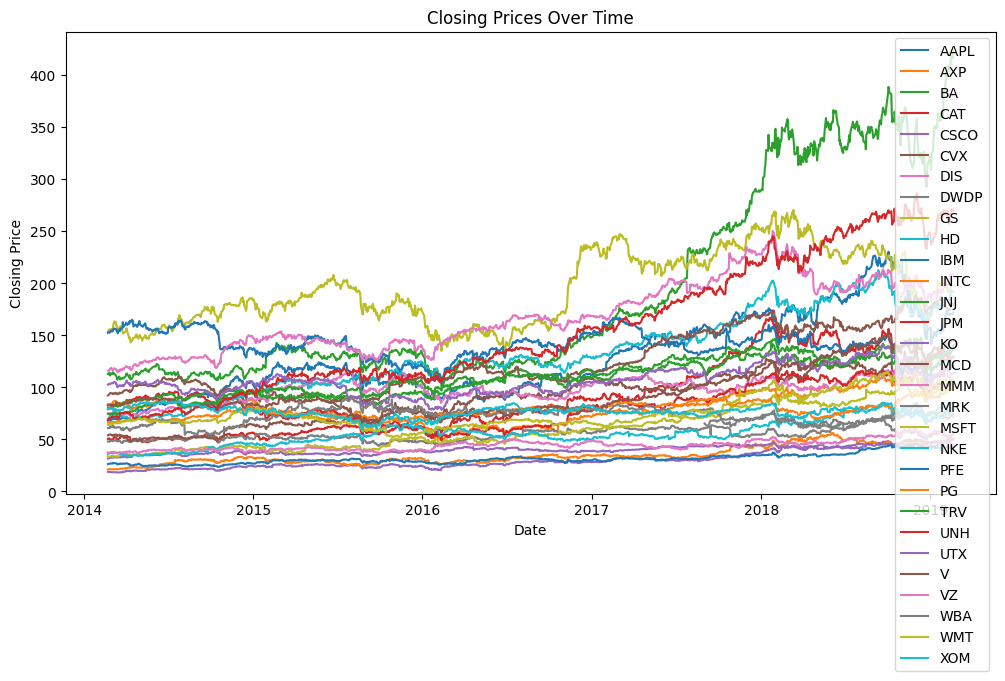

In [4]:
# Plot closing prices over time for each stock
plt.figure(figsize=(12, 6))
for stock_name, group in merged_df.groupby('stock_name'):
    plt.plot(group['date'], group['close'], label=stock_name)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

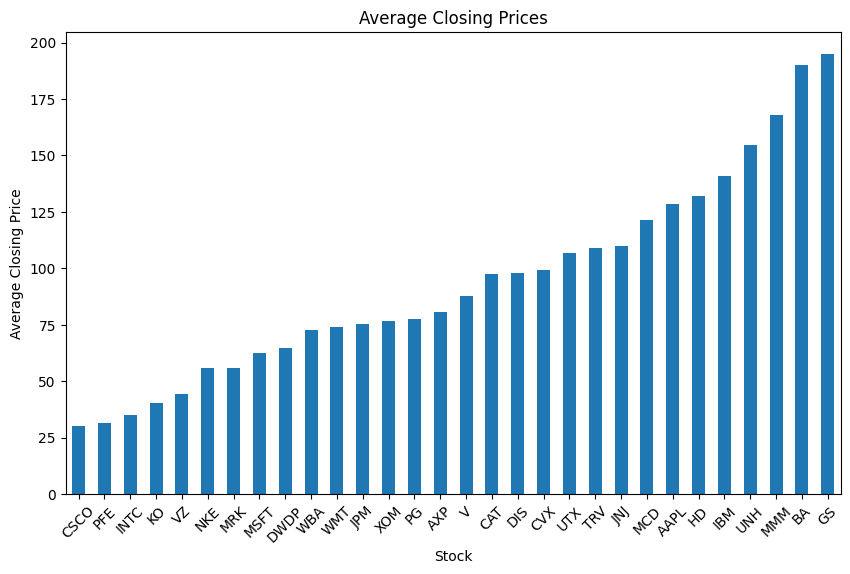

In [5]:
# Calculate average closing price for each stock
avg_closing_prices = merged_df.groupby('stock_name')['close'].mean()

# Plot average closing prices for each stock
plt.figure(figsize=(10, 6))
avg_closing_prices.sort_values().plot(kind='bar')
plt.title('Average Closing Prices')
plt.xlabel('Stock')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/cdmydl6s0dn5k20b1jjvphlw0000gn/T/ipykernel_77641/667386206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csco_df['price_change'] = csco_df['close'].diff()


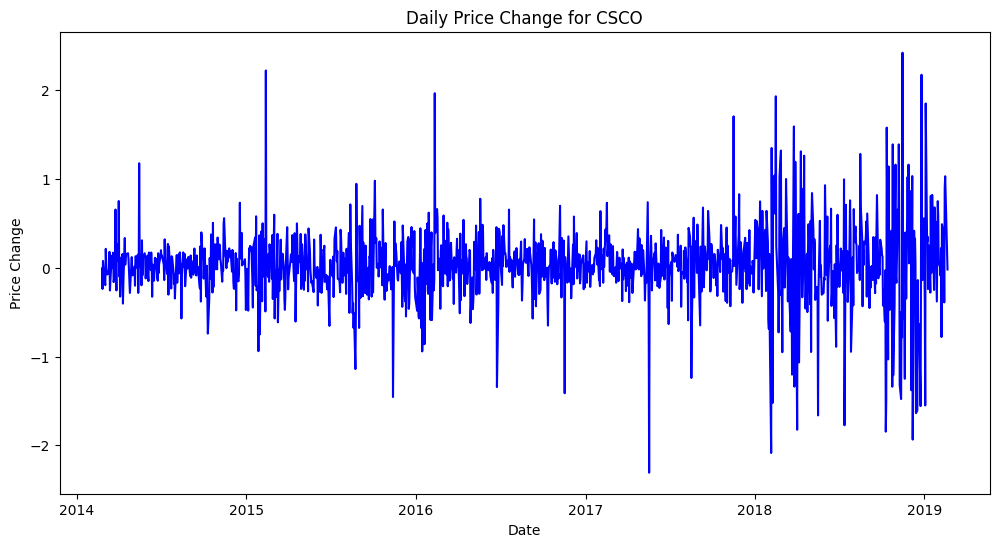

In [6]:
# Calculate and plot daily price change for a particular stock
csco_df = merged_df[merged_df['stock_name'] == 'CSCO']
csco_df['price_change'] = csco_df['close'].diff()

plt.figure(figsize=(12, 6))
plt.plot(csco_df['date'], csco_df['price_change'], color='blue', linestyle='-')
plt.title('Daily Price Change for CSCO')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()

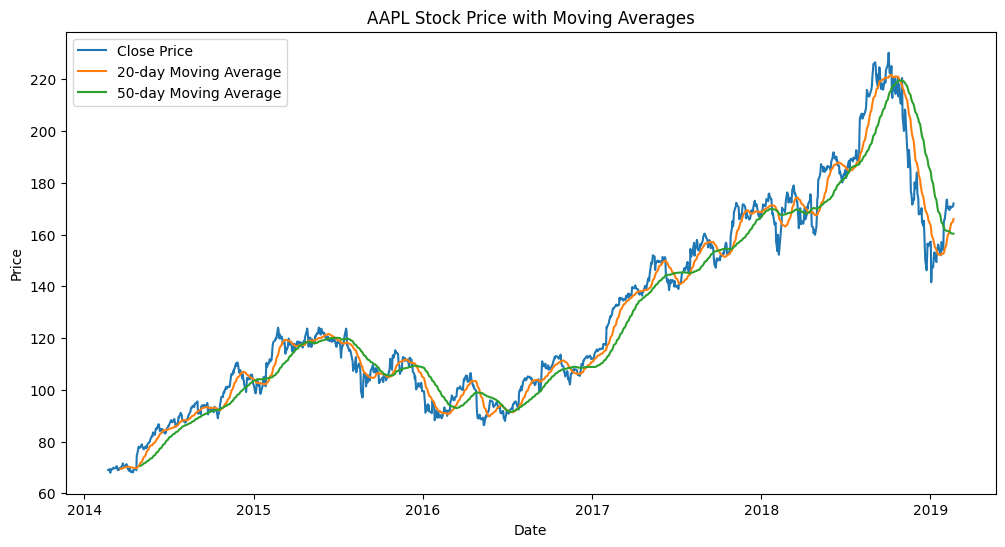

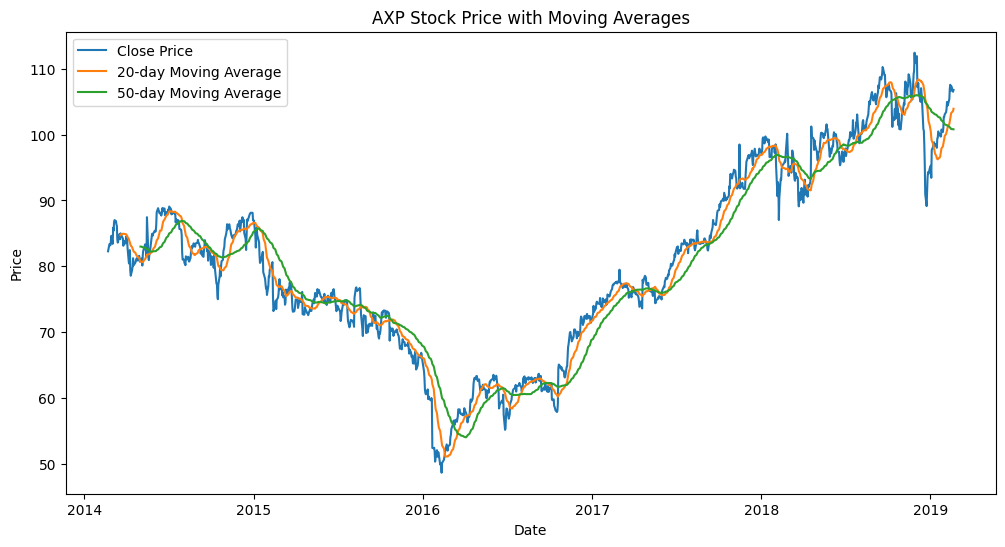

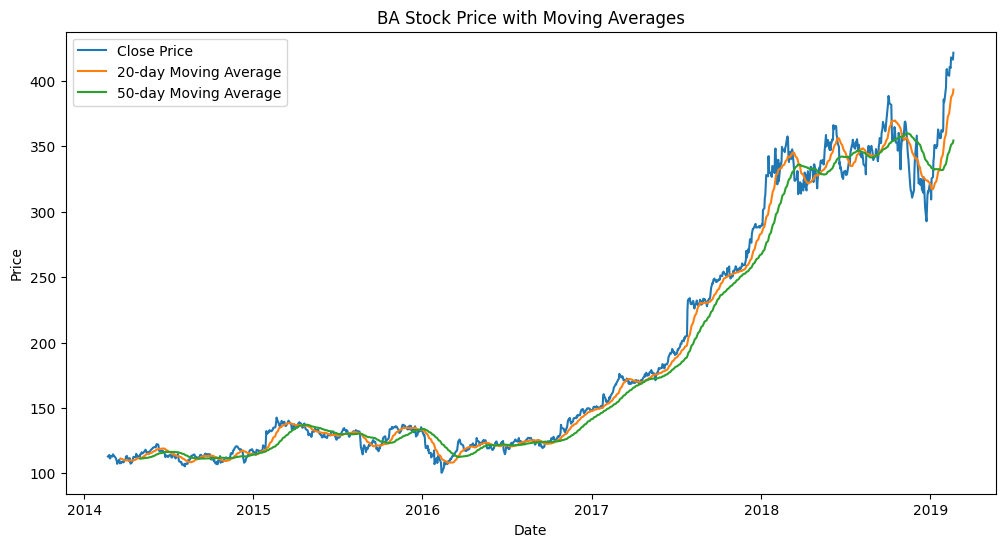

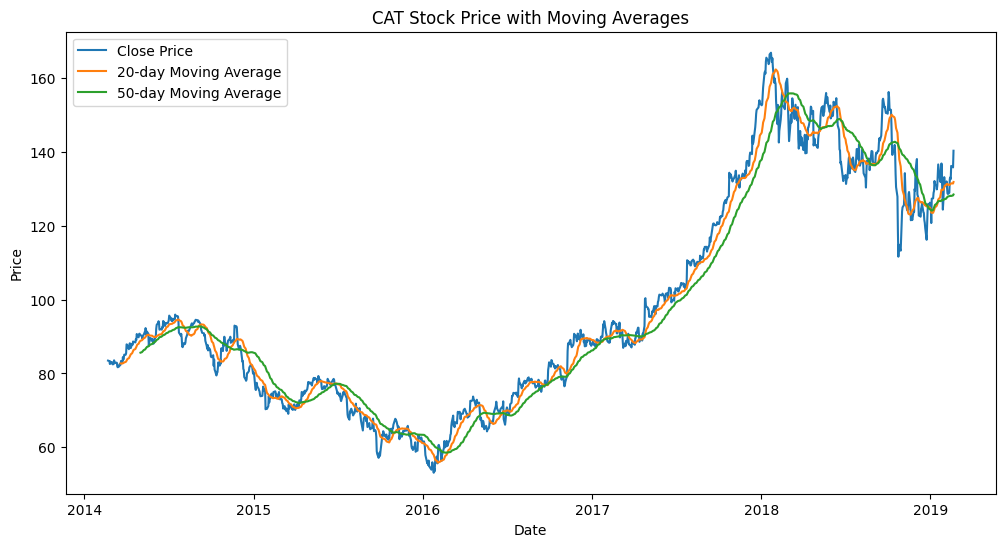

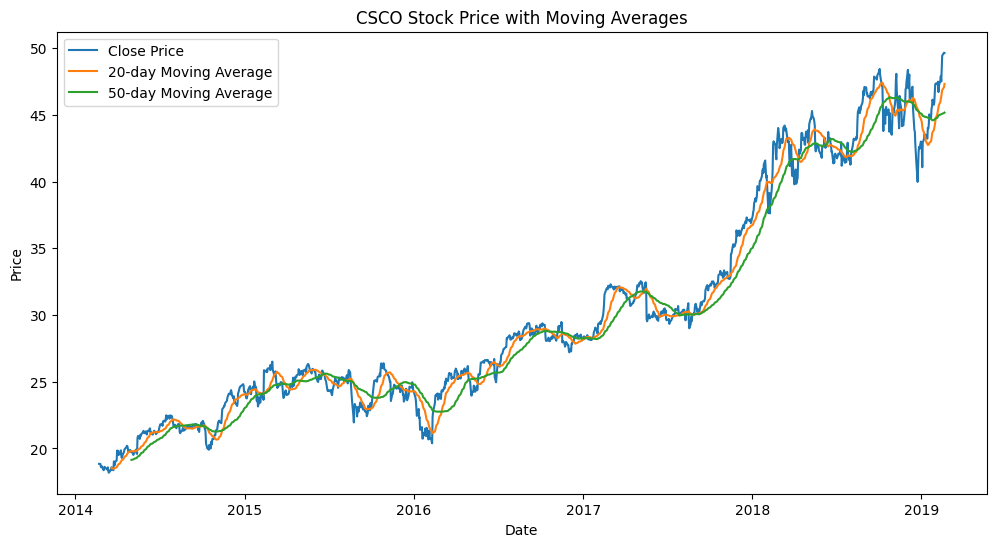

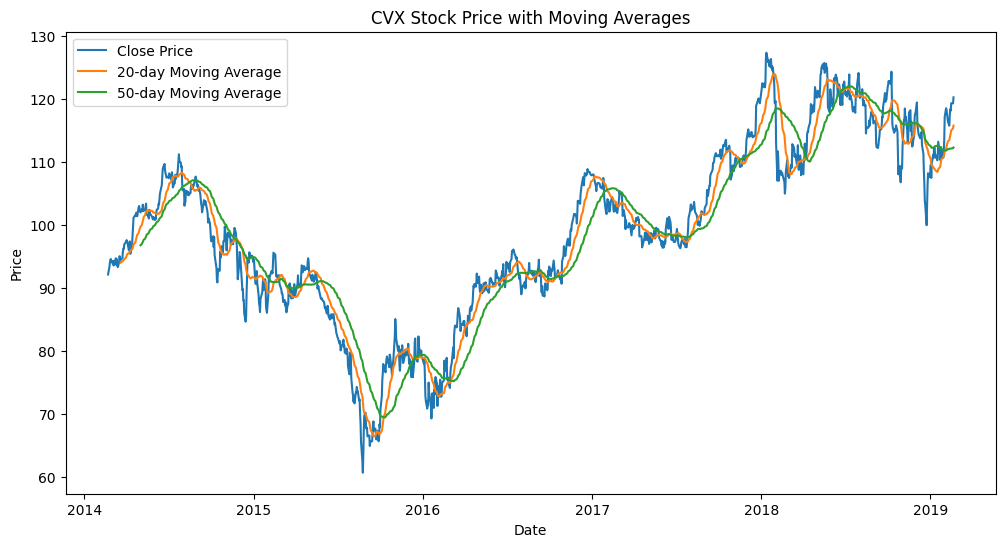

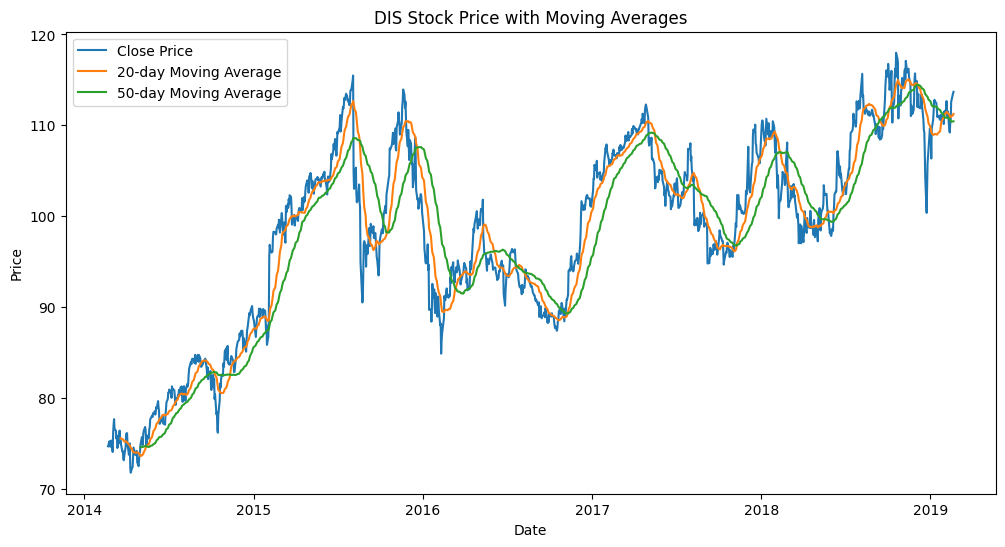

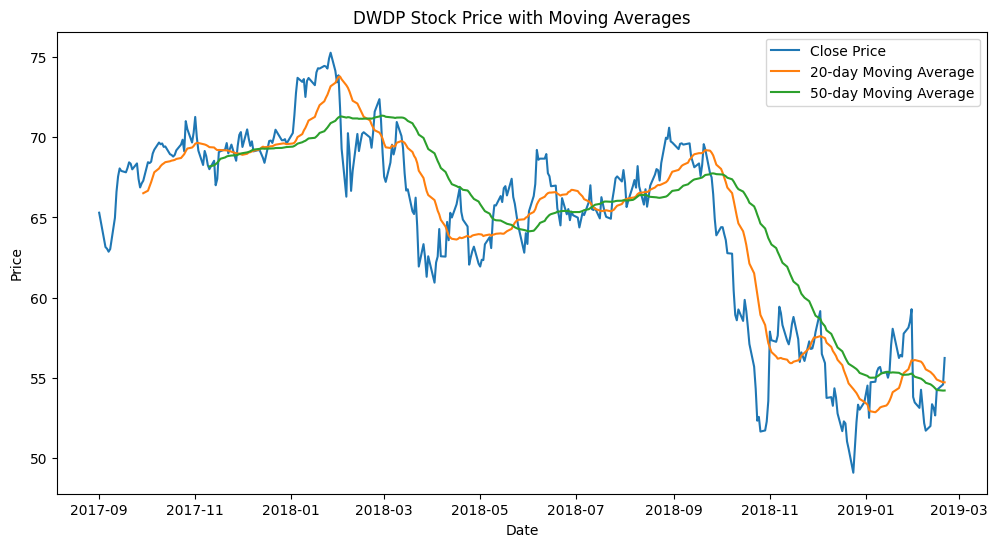

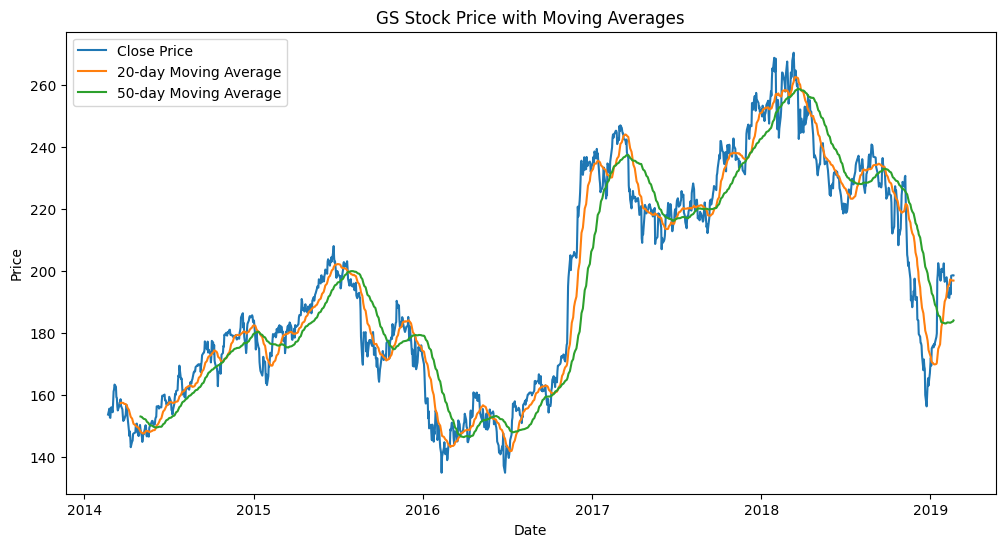

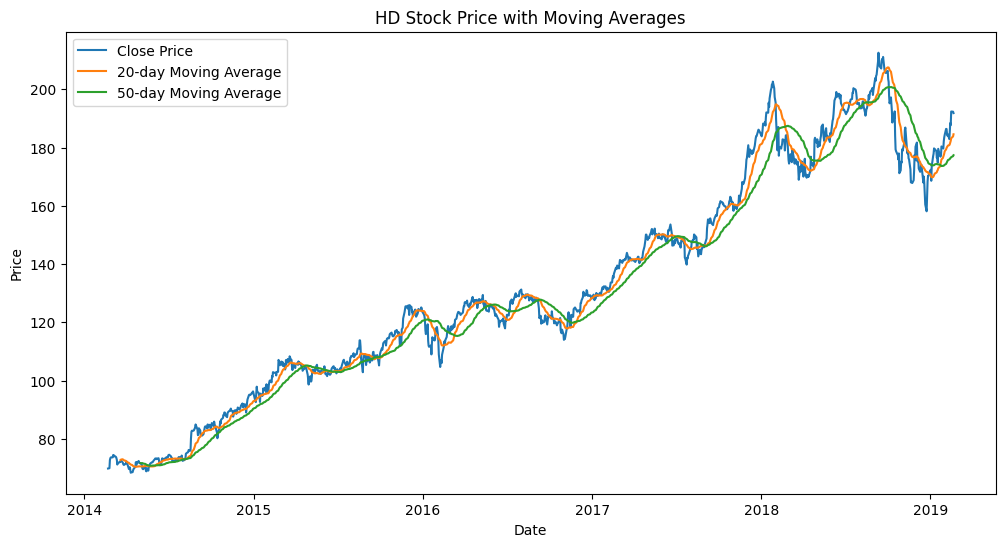

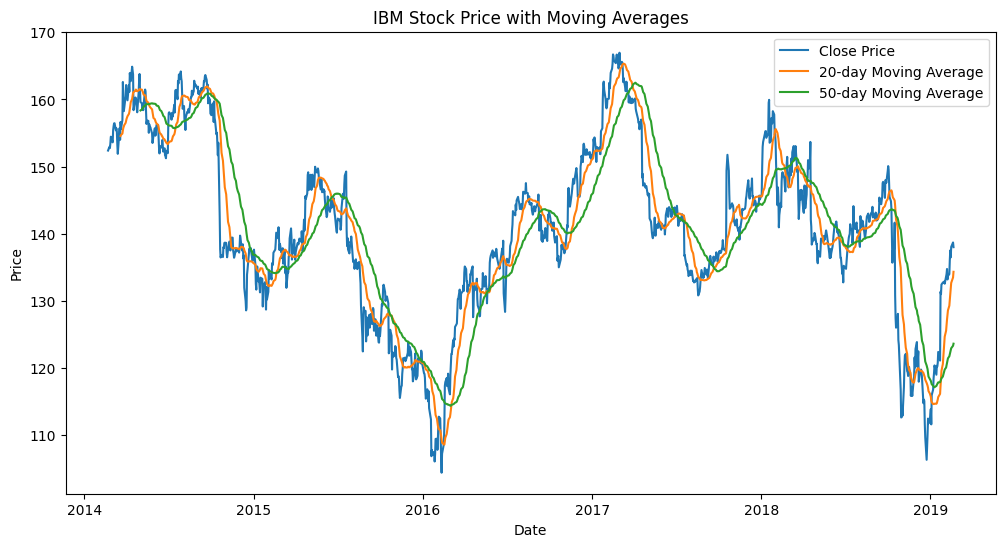

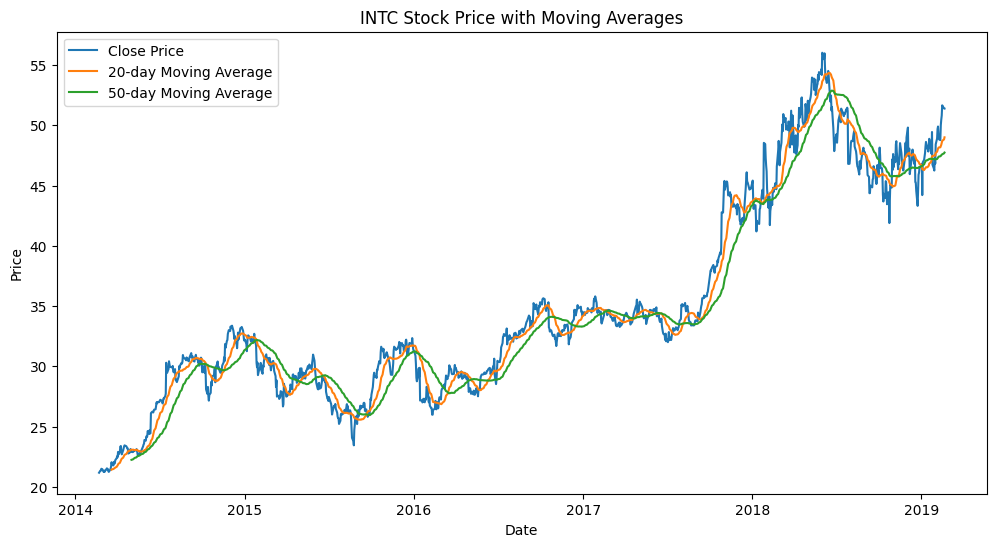

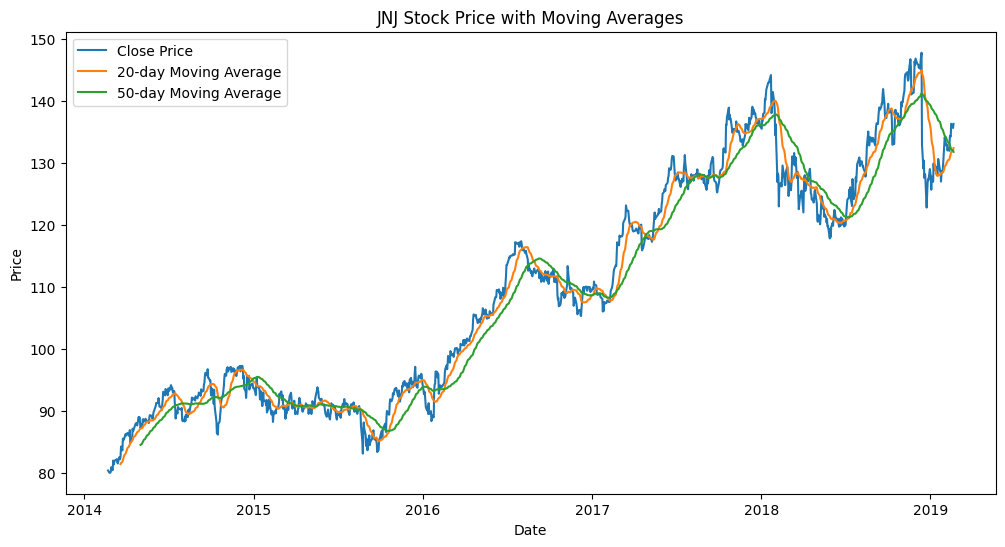

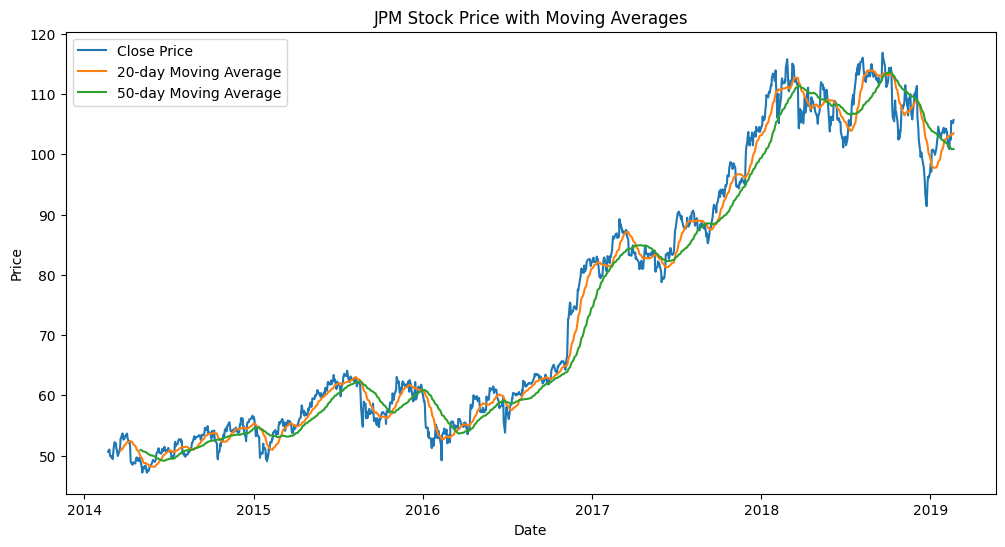

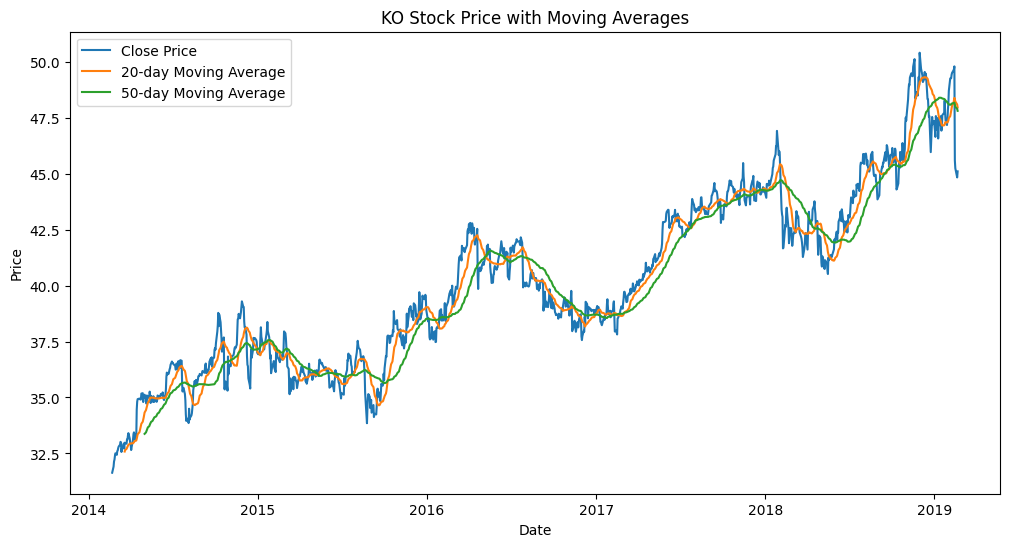

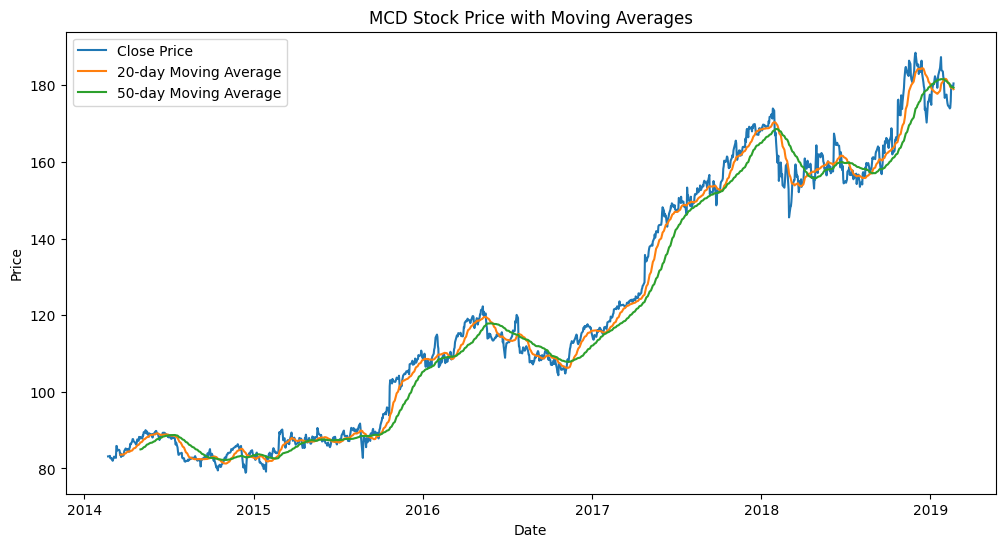

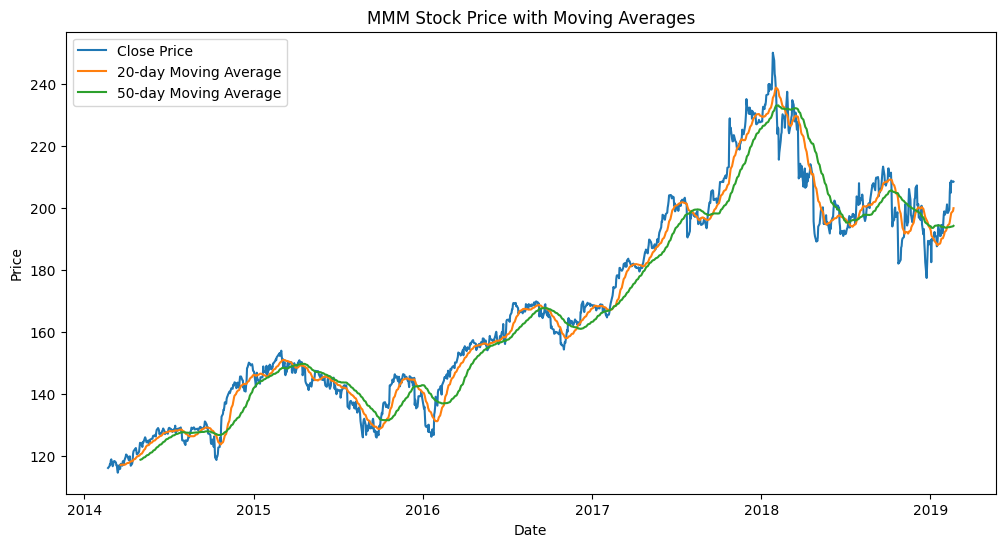

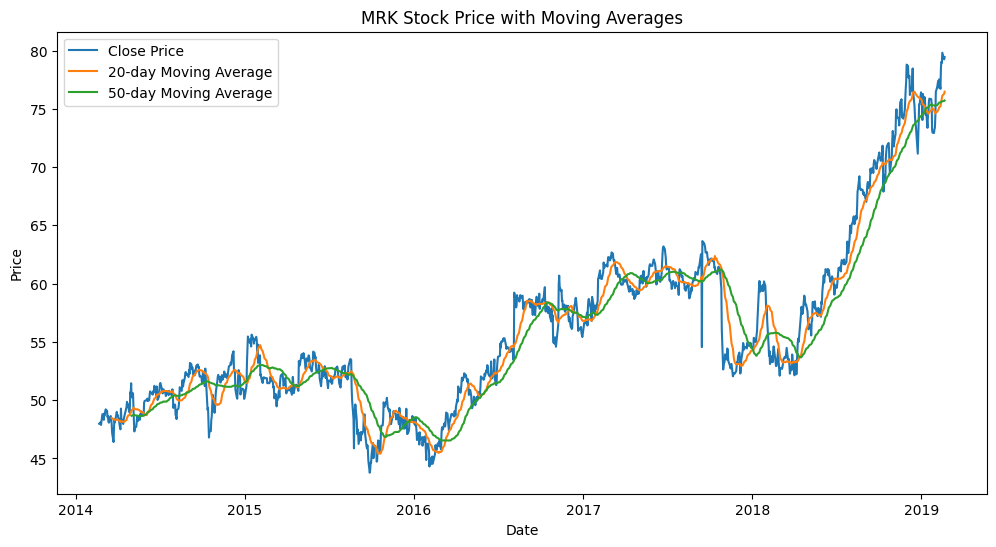

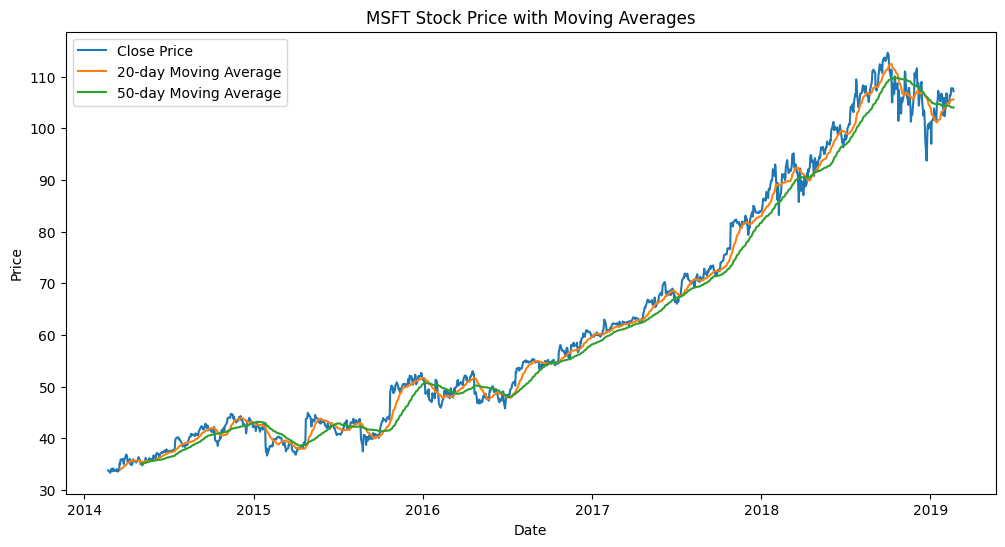

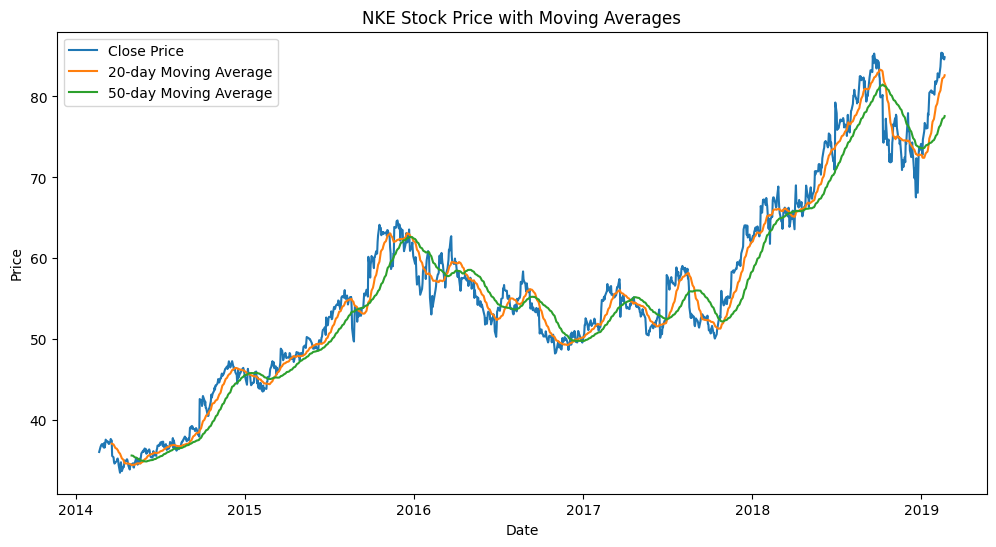

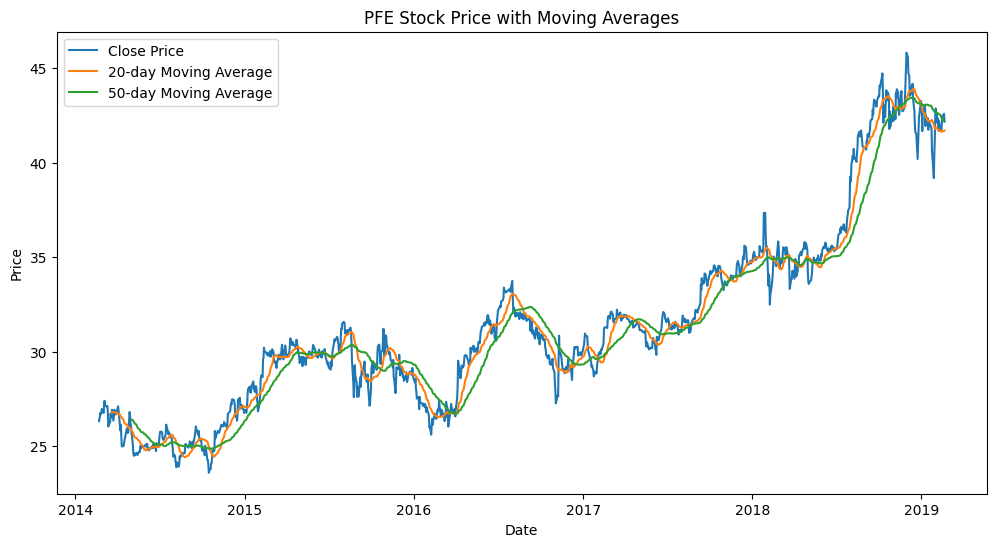

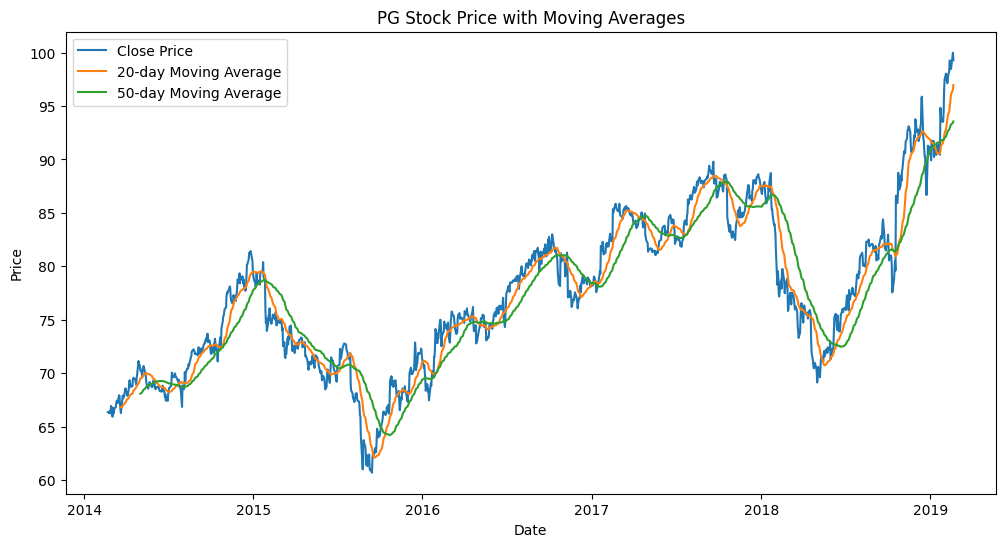

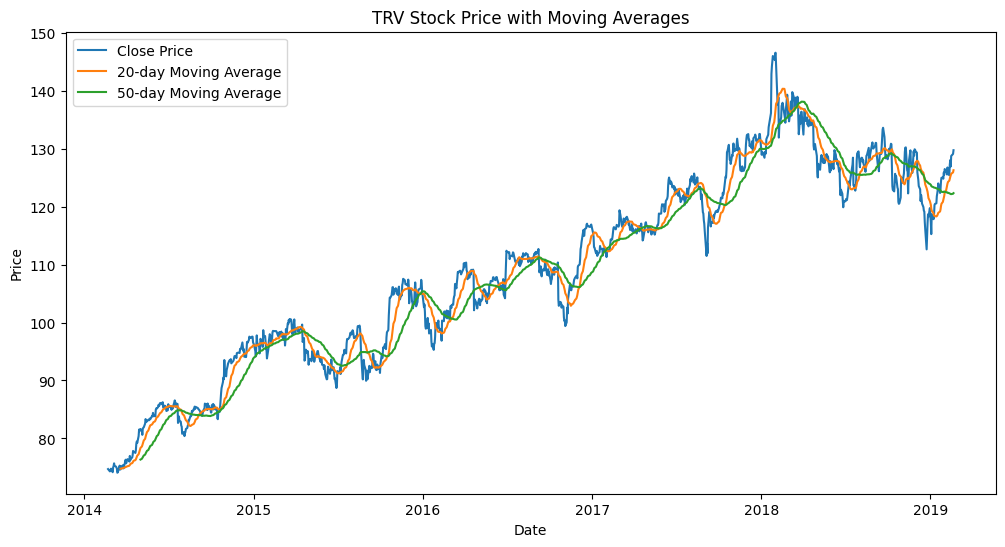

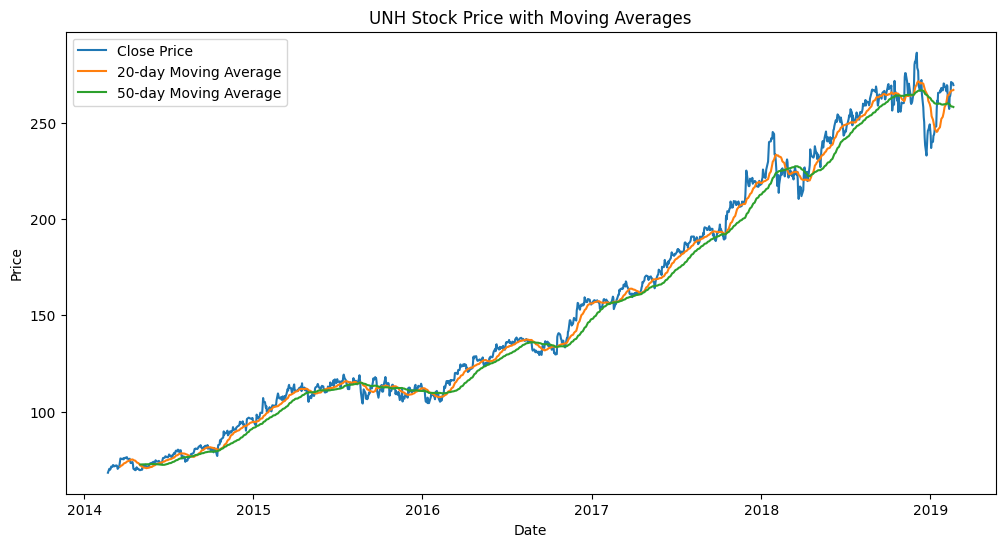

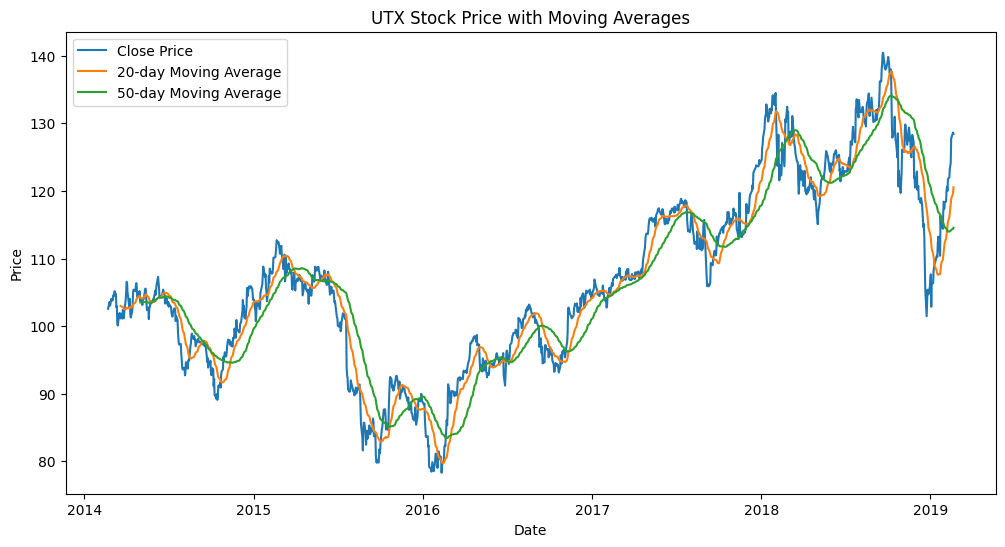

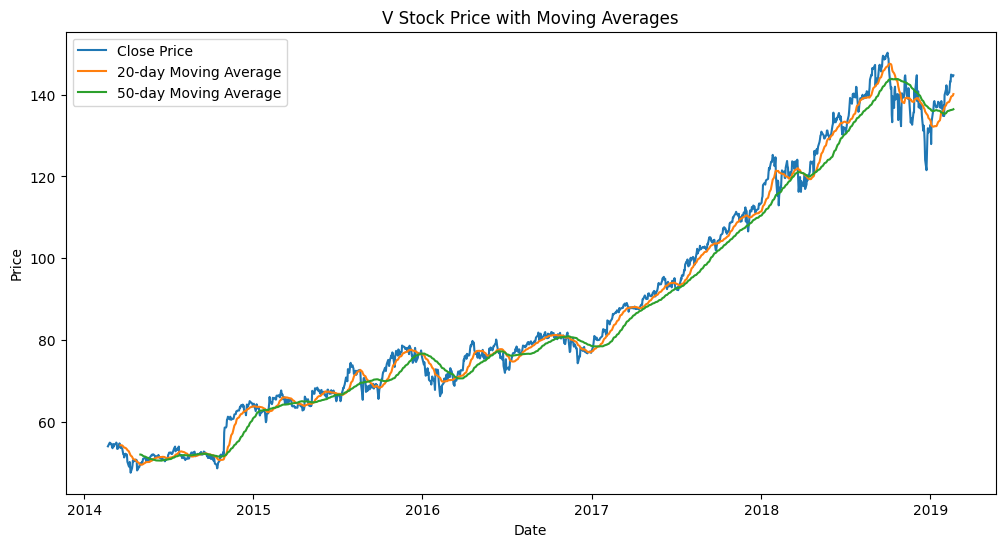

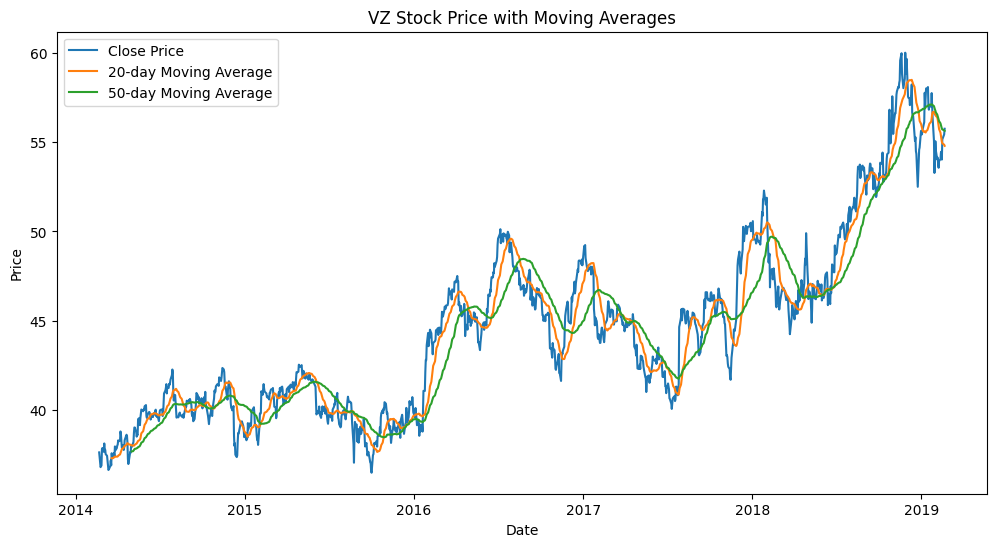

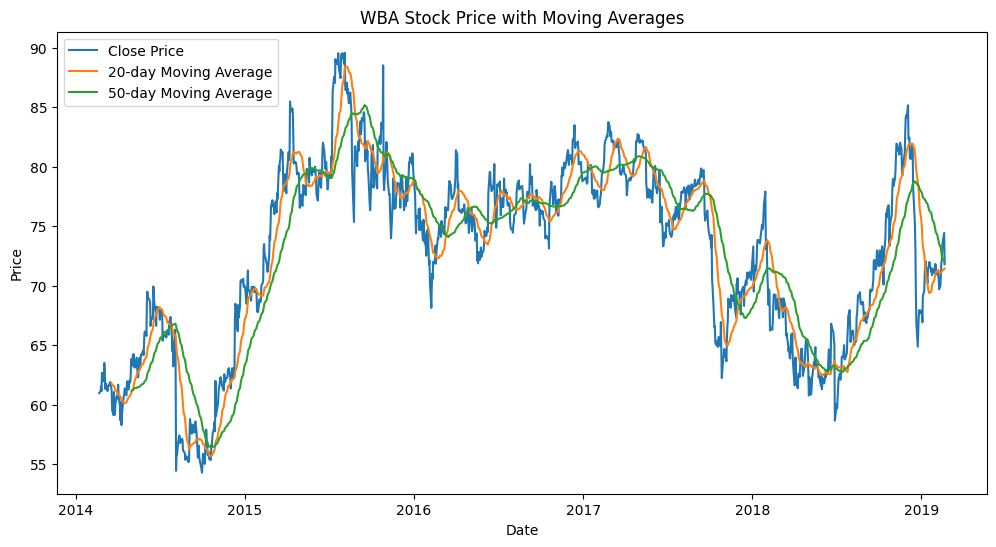

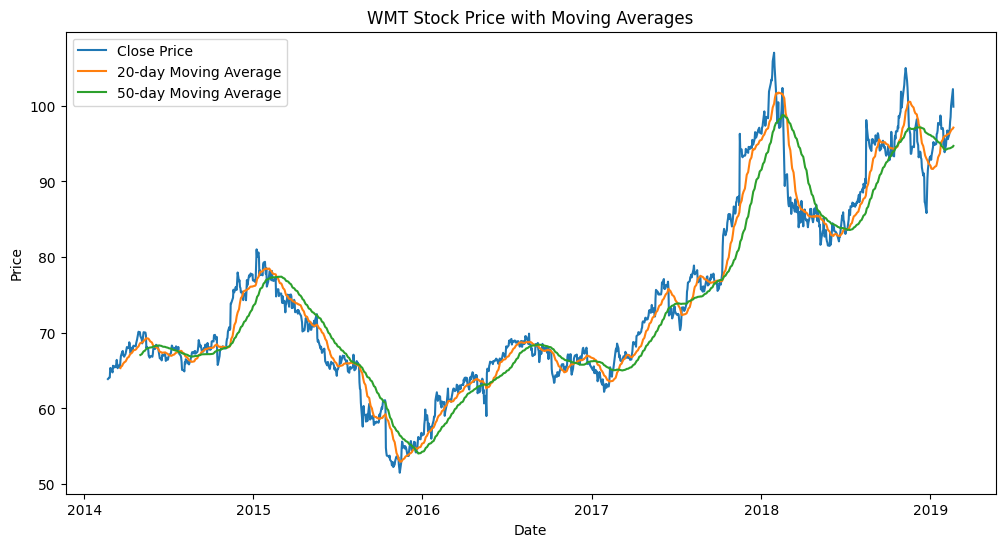

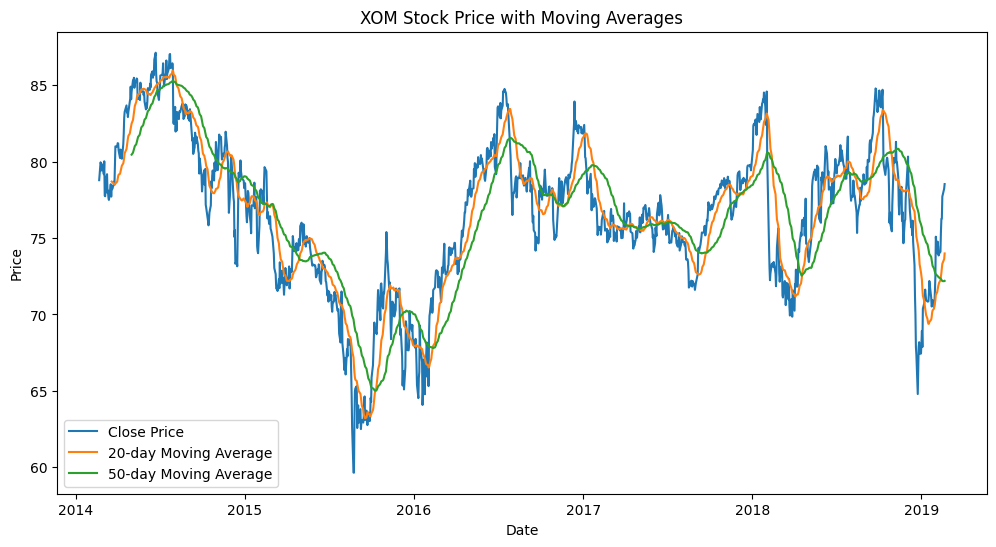

In [7]:
# Group by stock_name
grouped = merged_df.groupby('stock_name')

# Initialize empty lists to store moving averages
twenty_ma_list = []
fifty_ma_list = []

# Iterate over each group (stock)
for stock_name, group in grouped:
    # Calculate moving averages for each stock
    group['20_MA'] = group['close'].rolling(window=20).mean()
    group['50_MA'] = group['close'].rolling(window=50).mean()

    # Append moving averages to lists
    twenty_ma_list.append(group['20_MA'])
    fifty_ma_list.append(group['50_MA'])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(group['date'], group['close'], label='Close Price')
    plt.plot(group['date'], group['20_MA'], label='20-day Moving Average')
    plt.plot(group['date'], group['50_MA'], label='50-day Moving Average')
    plt.title(f'{stock_name} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Concatenate moving averages lists into DataFrame
twenty_ma_df = pd.concat(twenty_ma_list)
fifty_ma_df = pd.concat(fifty_ma_list)

# Add moving averages to merged_df
merged_df['20_MA'] = twenty_ma_df
merged_df['50_MA'] = fifty_ma_df

# Save merged DataFrame to CSV
merged_df.to_csv('merged_stock_data.csv', index=False)